In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import CSV file

In [114]:
df = pd.read_csv("data/StudentsPerformance.csv")

Show top 5 Records

In [115]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of Data

In [116]:
df.shape

(1000, 8)

Dataset Information

## 1.Dataset Information

### Columns (non-null counts & dtypes)
- gender : (Male/ Female)
- race/ethnicity : Group A, B, C, D, E
- parental level of education : (Bachelor's degress, some college, master's degree, associate's degree, high School)
- lunch — having lunch before test ( standard or free/reduced)
- test preparation course - complete or not complete before test 
- math score
- reading score
- writing score


## 2. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 2.1 Missing Value

In [117]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 2.2 Duplicates

In [118]:
df.duplicated().sum()

np.int64(0)

### 2.3 Check Data Type

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 2.4 Checking the number of unique value of each column

In [120]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 2.5 Check Statistics of Dataset

In [121]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights
- All means are very close to each other between 66.08 - 69.15
- All Standard Deviation are also close between 14.6 - 15.19
- While for Minimum Score 0 for Maths, 17 for reading and 10 for writing Score
- While for Maximum Score 100 for all three subjects

## 3. Exploring Data

In [122]:
print("categories in 'gender' variable:   ", end=" ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable:  ", end=" ")
print(df['race/ethnicity'].unique())

print("categories in 'Parental Level Of edication' variable:  ", end=" ")
print(df['parental level of education'].unique())

print("categories in 'Lunch' variable:  ", end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable:  ", end=" ")
print(df['test preparation course'].unique())

categories in 'gender' variable:    ['female' 'male']
categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'Parental Level Of edication' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'Lunch' variable:   ['standard' 'free/reduced']
categories in 'test preparation course' variable:   ['none' 'completed']


In [123]:
# define numerical & Categorical Columns
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()


# print columns
print('We have {} numeircal features : {}'.format(len(numeric_features), numeric_features))
print('\n We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numeircal features : ['math score', 'reading score', 'writing score']

 We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.1 Adding Columns for "Total Score" and "Average"

In [124]:
df['total score'] = df['math score'] +  df['reading score']+ df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [125]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of student with full marks in Maths:{math_full}')
print(f'Number of student with full marks in Writing:{writing_full}')
print(f'Number of student with full marks in Reading:{reading_full}')

Number of student with full marks in Maths:7
Number of student with full marks in Writing:14
Number of student with full marks in Reading:17


In [126]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of student with less than 20 marks in Maths:{math_less_20}')
print(f'Number of student with less than 20 marks in Writing:{writing_less_20}')
print(f'Number of student with less than 20 marks in Reading:{reading_less_20}')

Number of student with less than 20 marks in Maths:4
Number of student with less than 20 marks in Writing:3
Number of student with less than 20 marks in Reading:1


### Insigths
- From above values we get student have performed the worst in Maths
- Best performance is in readaing section

## 4 Data Visualization

Visalize average score distribution to make some conclusion
- Histogram
- Kernel Distribution (KDE)

### 4.1 Histogram and KDE



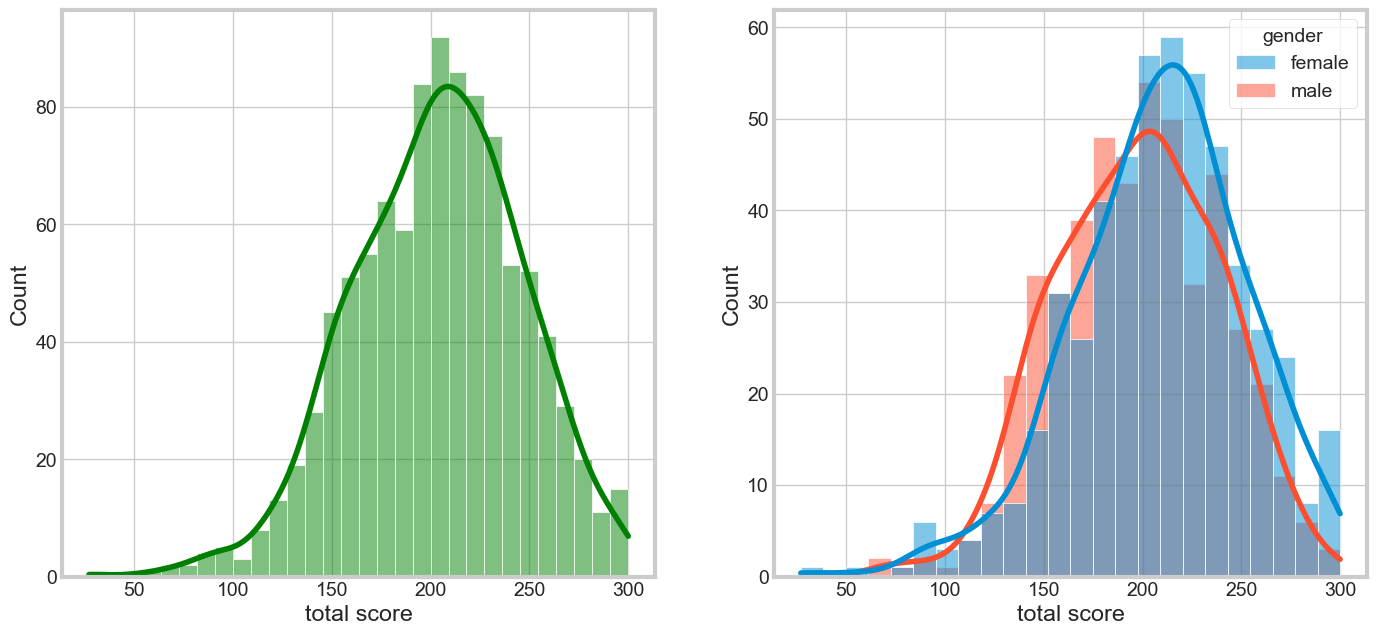

In [127]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

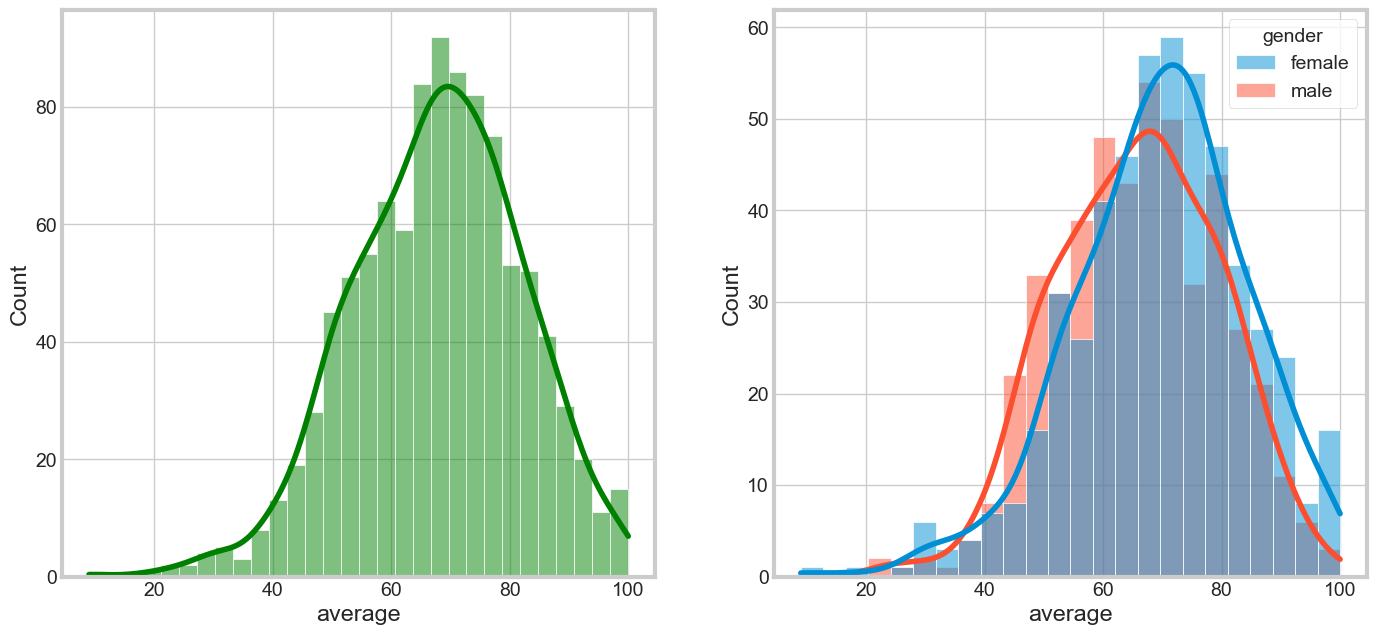

In [128]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

#### Insigths
- Female students tend to perform well then male students

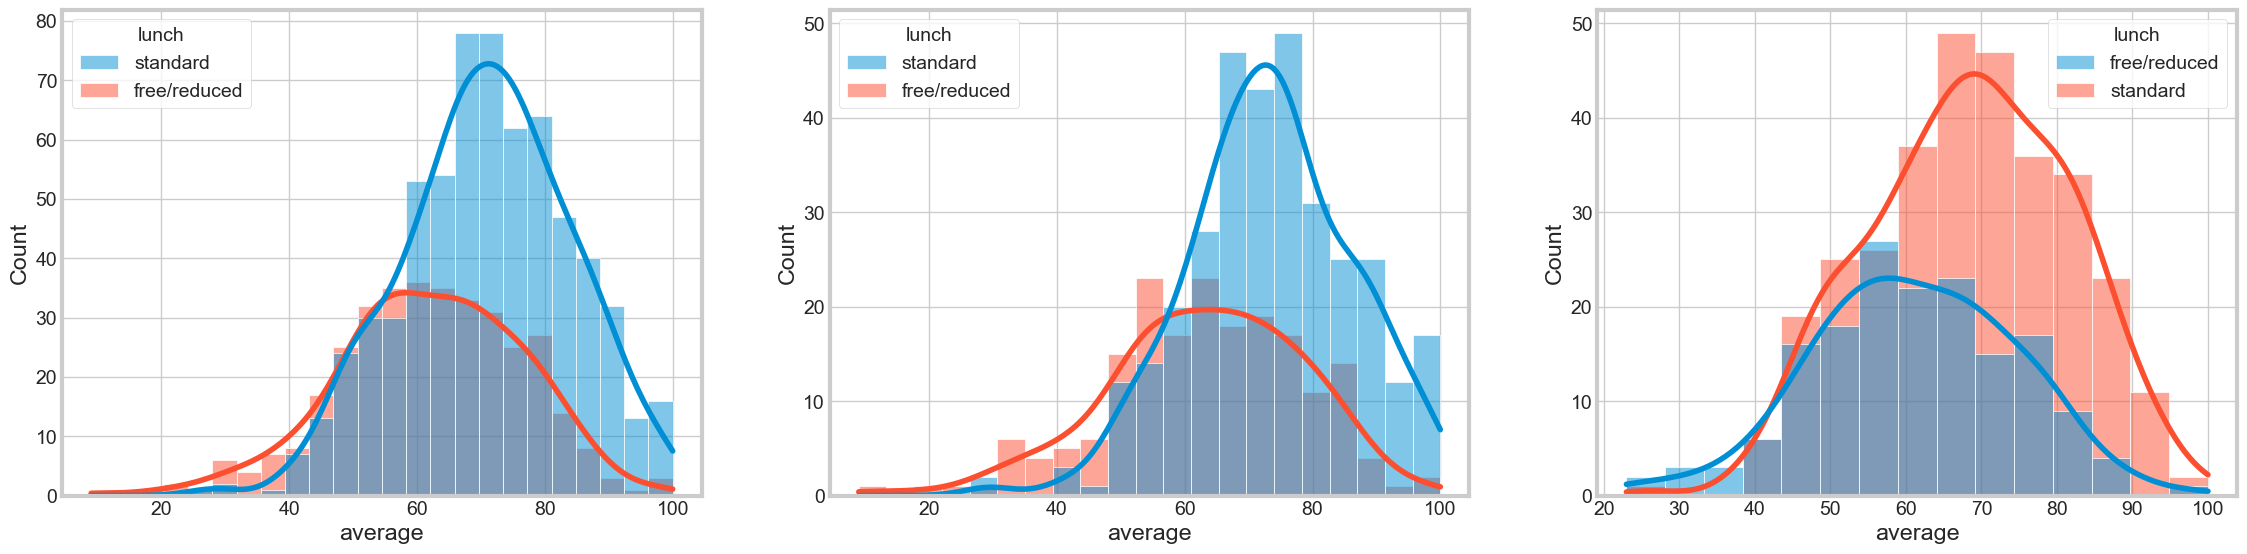

In [129]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x = 'average', kde=True, hue='lunch')
plt.show()

#### Insights
- Standard lunch helps perform well in exams.
- standard lunch helps perform well in exams be it a male or a female.

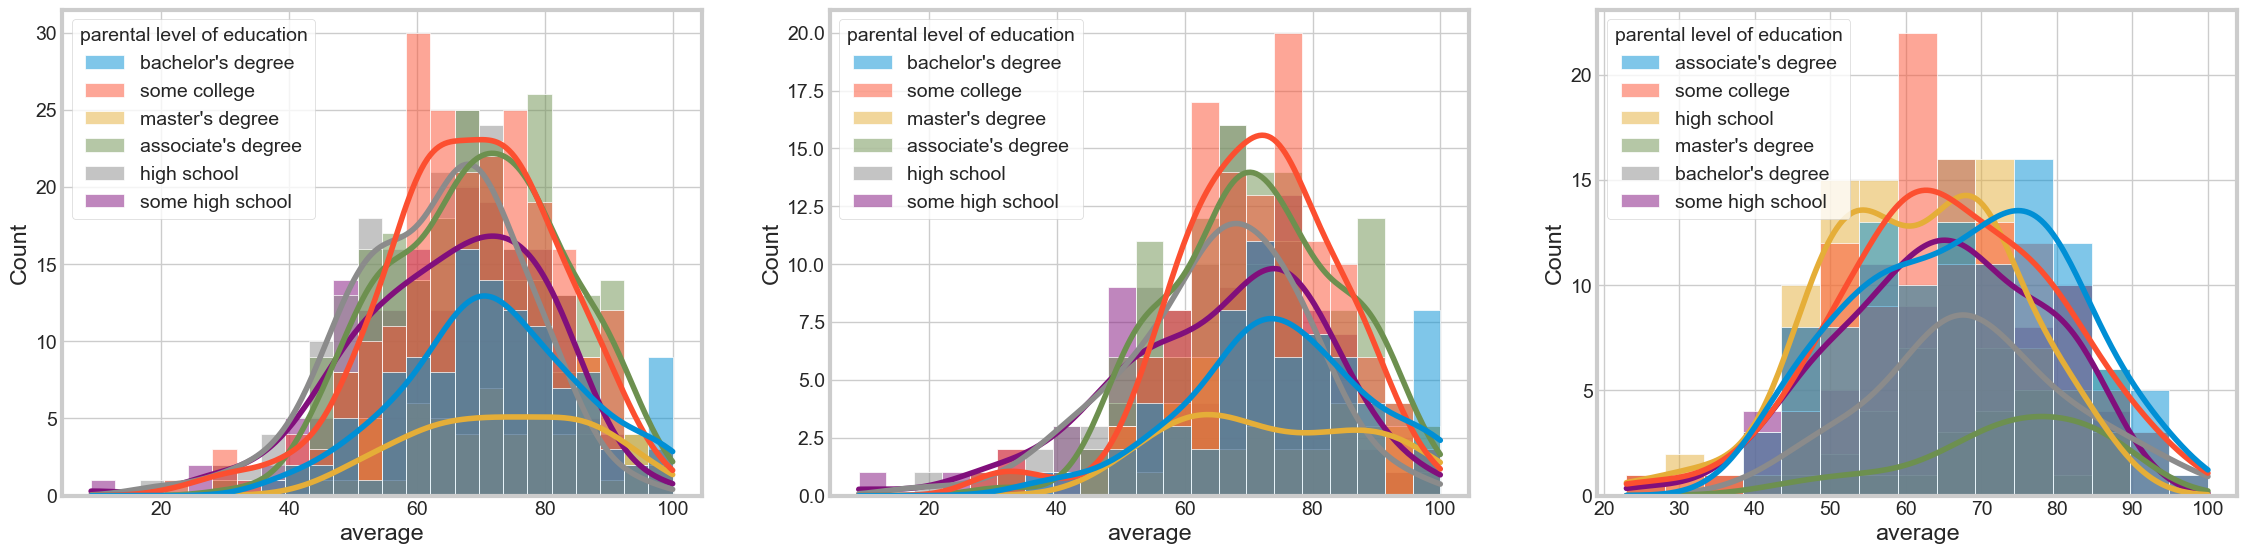

In [130]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x = 'average', kde=True, hue='parental level of education')
plt.show()

#### Insigths
- In general parent's education don't help student perform well in exam
- 2nd Plot shows that parent's whose education is of associate's degree or master's degree their child tend to perform well in exam.
- 3rd plot we can see there is no effect of parent's education on female students.

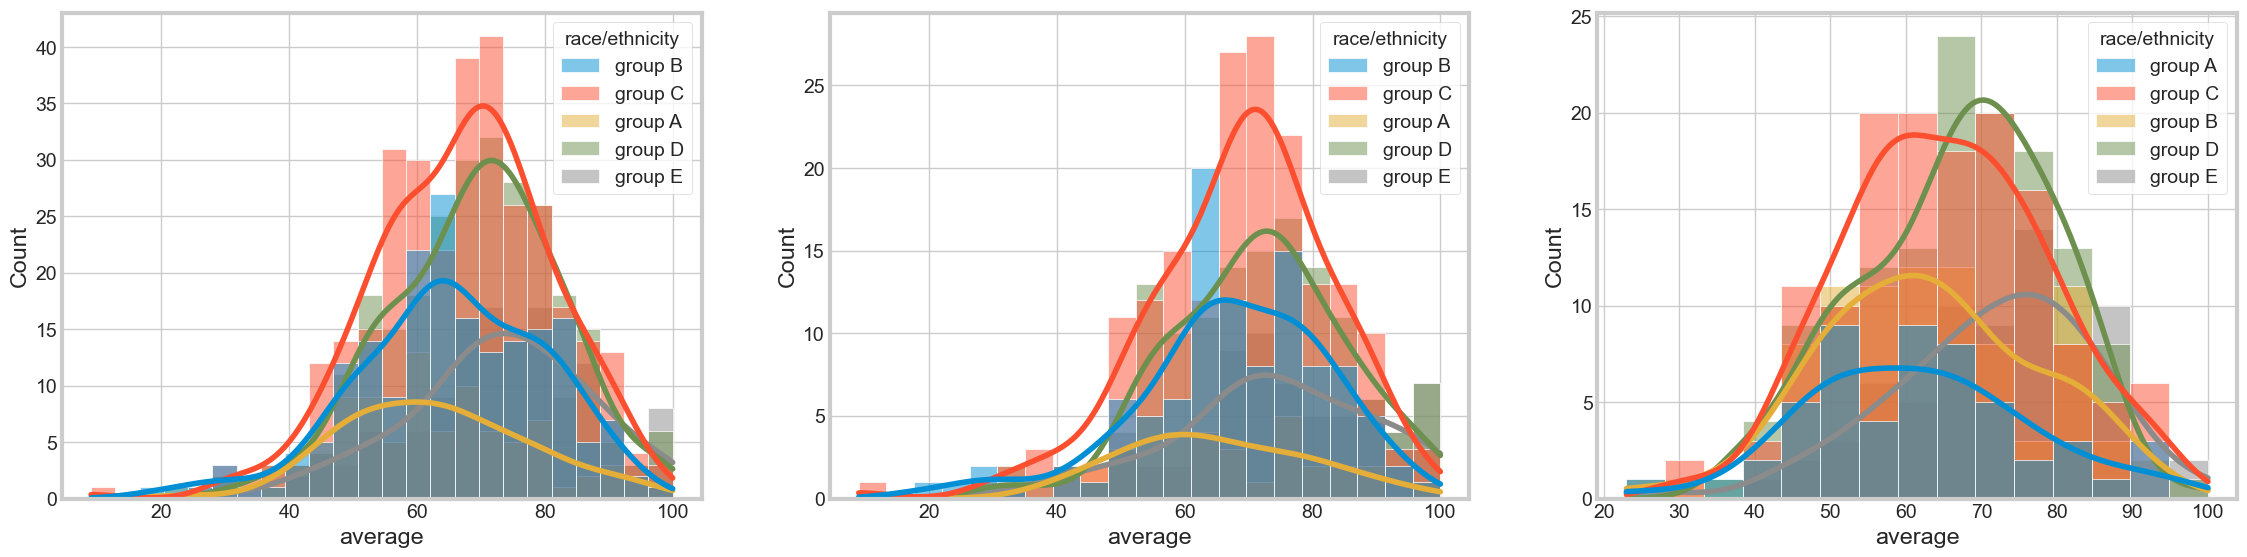

In [131]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x = 'average', kde=True, hue='race/ethnicity')
plt.show()

#### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of thether they are male or female.


### 4.2 Maximum score of students in all three subjects

<Axes: title={'center': 'Writing Scores'}, ylabel='writing score'>

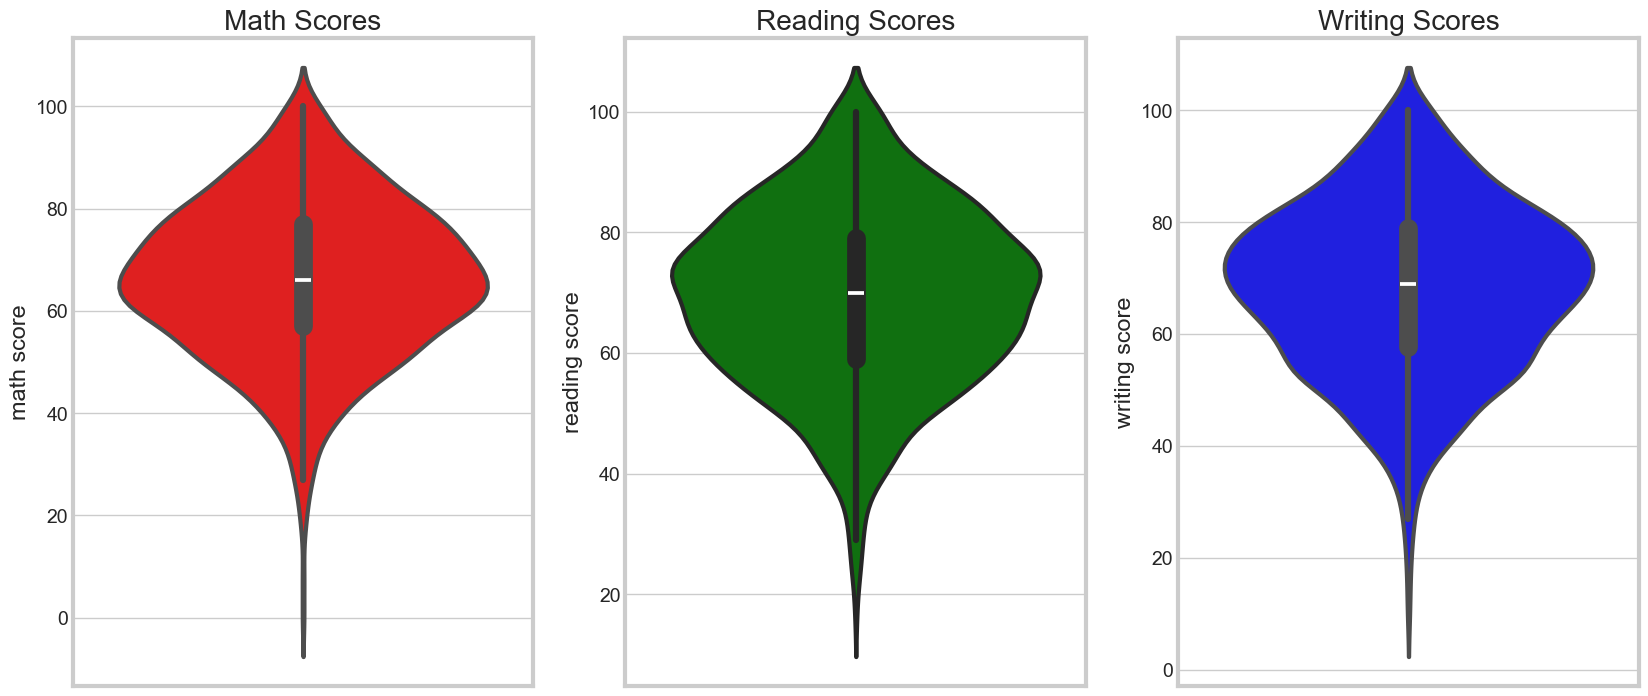

In [132]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('Math Scores')
sns.violinplot(y = 'math score', data=df, color='red', linewidth=3)
plt.subplot(1, 3, 2)
plt.title('Reading Scores')
sns.violinplot(y = 'reading score', data=df, color='green', linewidth=3)
plt.subplot(1, 3, 3)
plt.title('Writing Scores')
sns.violinplot(y = 'writing score', data=df, color='blue', linewidth=3)


#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3 Multivaiate analysis using pieplot

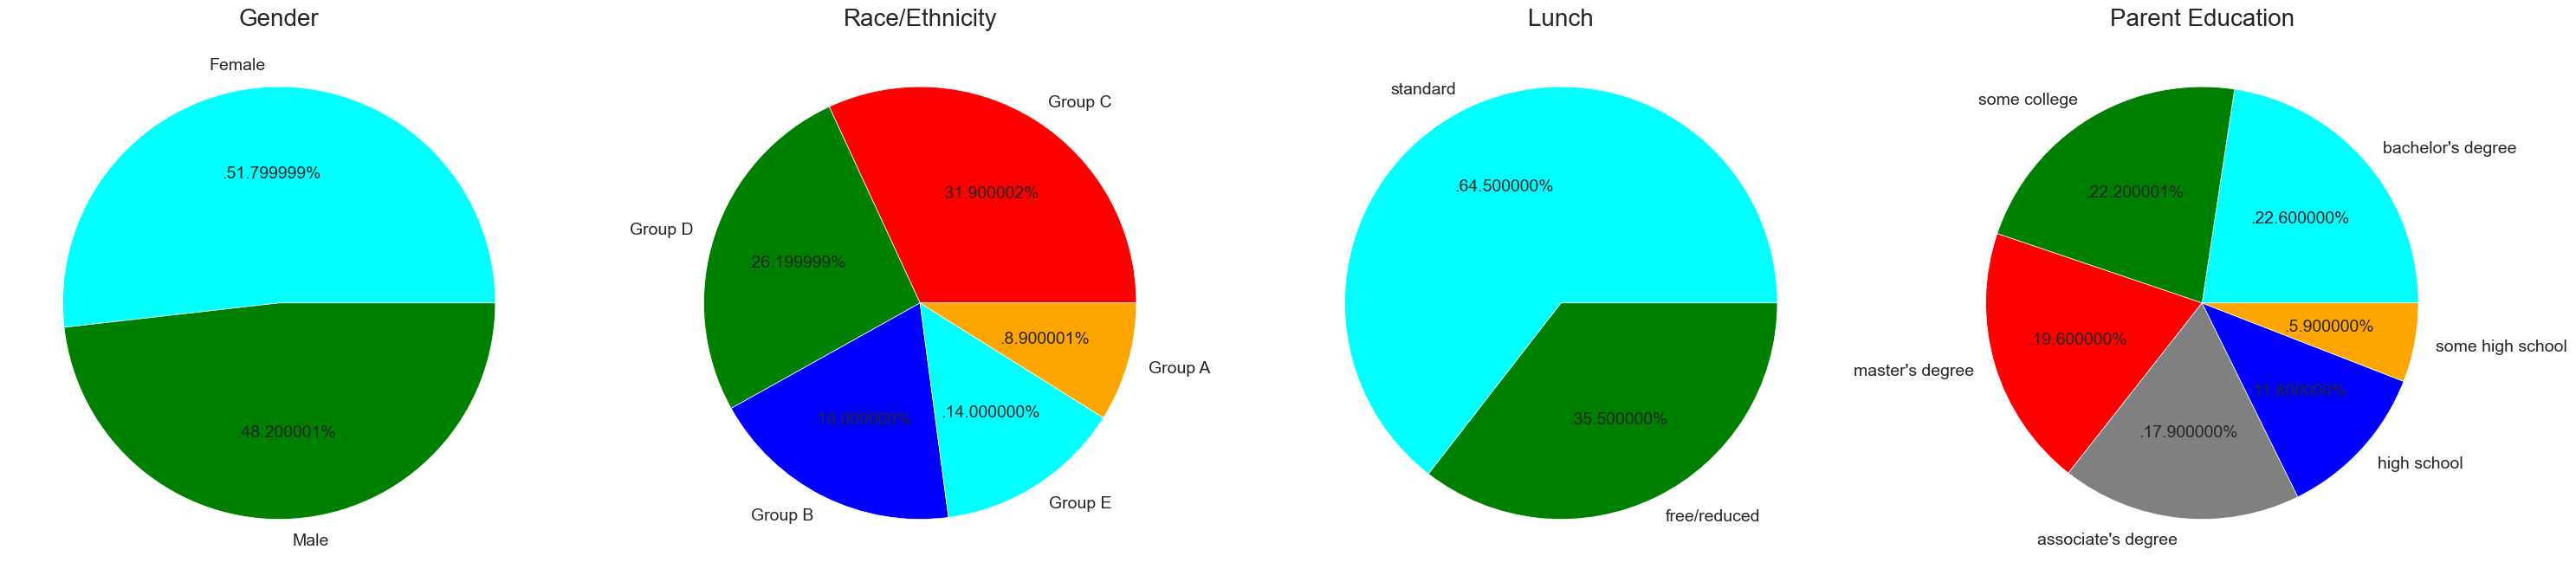

In [133]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,4,1)


size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['cyan', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors = color, labels = labels, autopct ='.%2f%%' )
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 3)
size = df['lunch'].value_counts()
labels = 'standard' ,'free/reduced'
color = ['cyan', 'green']

plt.pie(size, colors = color, labels = labels, autopct ='.%2f%%' )
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 4)
size = df['parental level of education'].value_counts()
labels = "bachelor's degree", 'some college', "master's degree" ,"associate's degree", 'high school', 'some high school'
color = ['cyan', 'green', 'red', 'grey', 'blue', 'orange']

plt.pie(size, colors = color, labels = labels, autopct ='.%2f%%' )
plt.title('Parent Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights
- Number of Male and Female students is almost equal.
- Number of Students as greater in Group C.
- Number of Students who have standard lunch are greater.
- Number of Students who have not enrolled in any test preparation course is greater.
- Number of students whose parental education is from "Some College" is greater followed closely by "Associate's Degree".


### 4.4 Feature Wise Visualization

#### 4.4.1 Gender Column


- How is distribution of Gender?
- Is gender has any impact on studenty's performance ?

##### Univariate Analysis ( How is distribution of Gender ?)

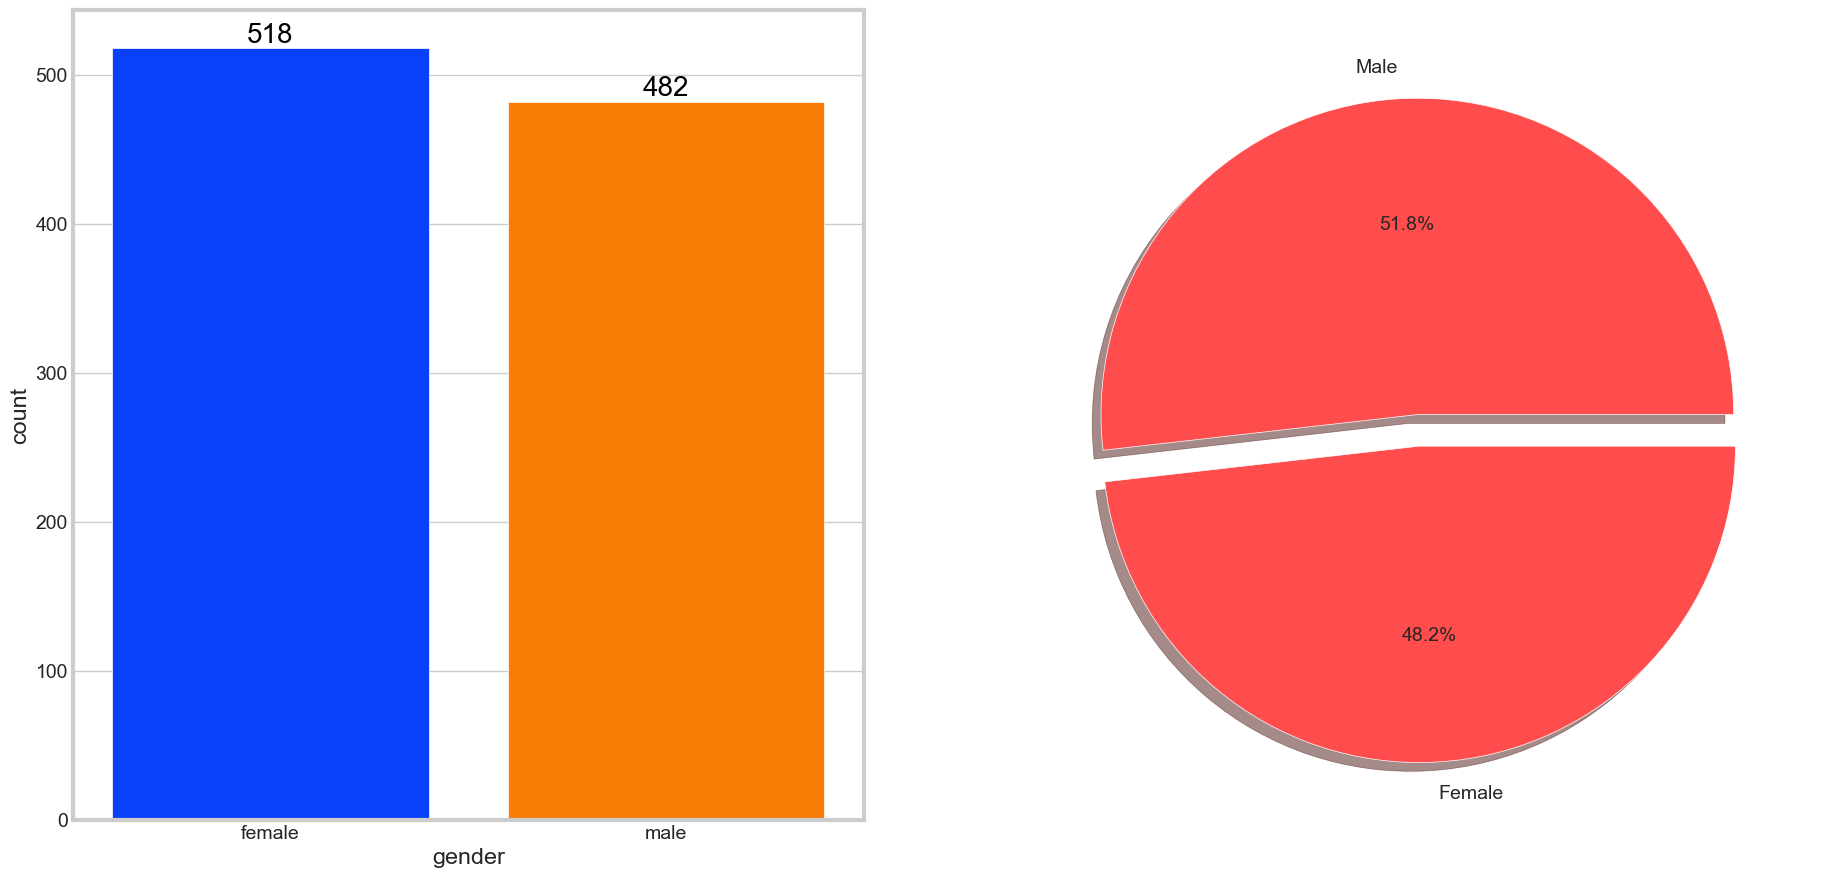

In [134]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette = 'bright', ax = ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0,0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d'])
plt.show()

##### Insigths
- Gender has balanced data with female students are 518 (48%) and malestudents are 482 (52%)

##### Bivariate Analysis ( Is gender has any impact on Student's Performance ?)

In [135]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


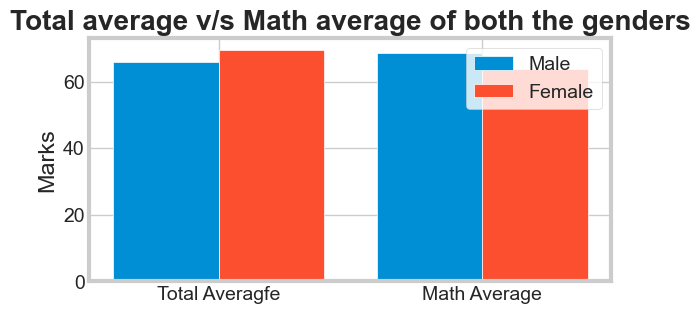

In [136]:
plt.figure(figsize=(6,3))

X = ['Total Averagfe', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')


plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average of both the genders", fontweight = 'bold')
plt.legend()
plt.show()

##### Insigths
- On an average females have a better overall score than men.
- Whereas males have scored higher in Maths.

#### 4.4.2 Race/Ethnicity Column


- How is Group wise Distribution
- Is Race/Ethnicity has any impact on student's performance ?

##### Univariant Analysis ( How is Group wise distribution ?)

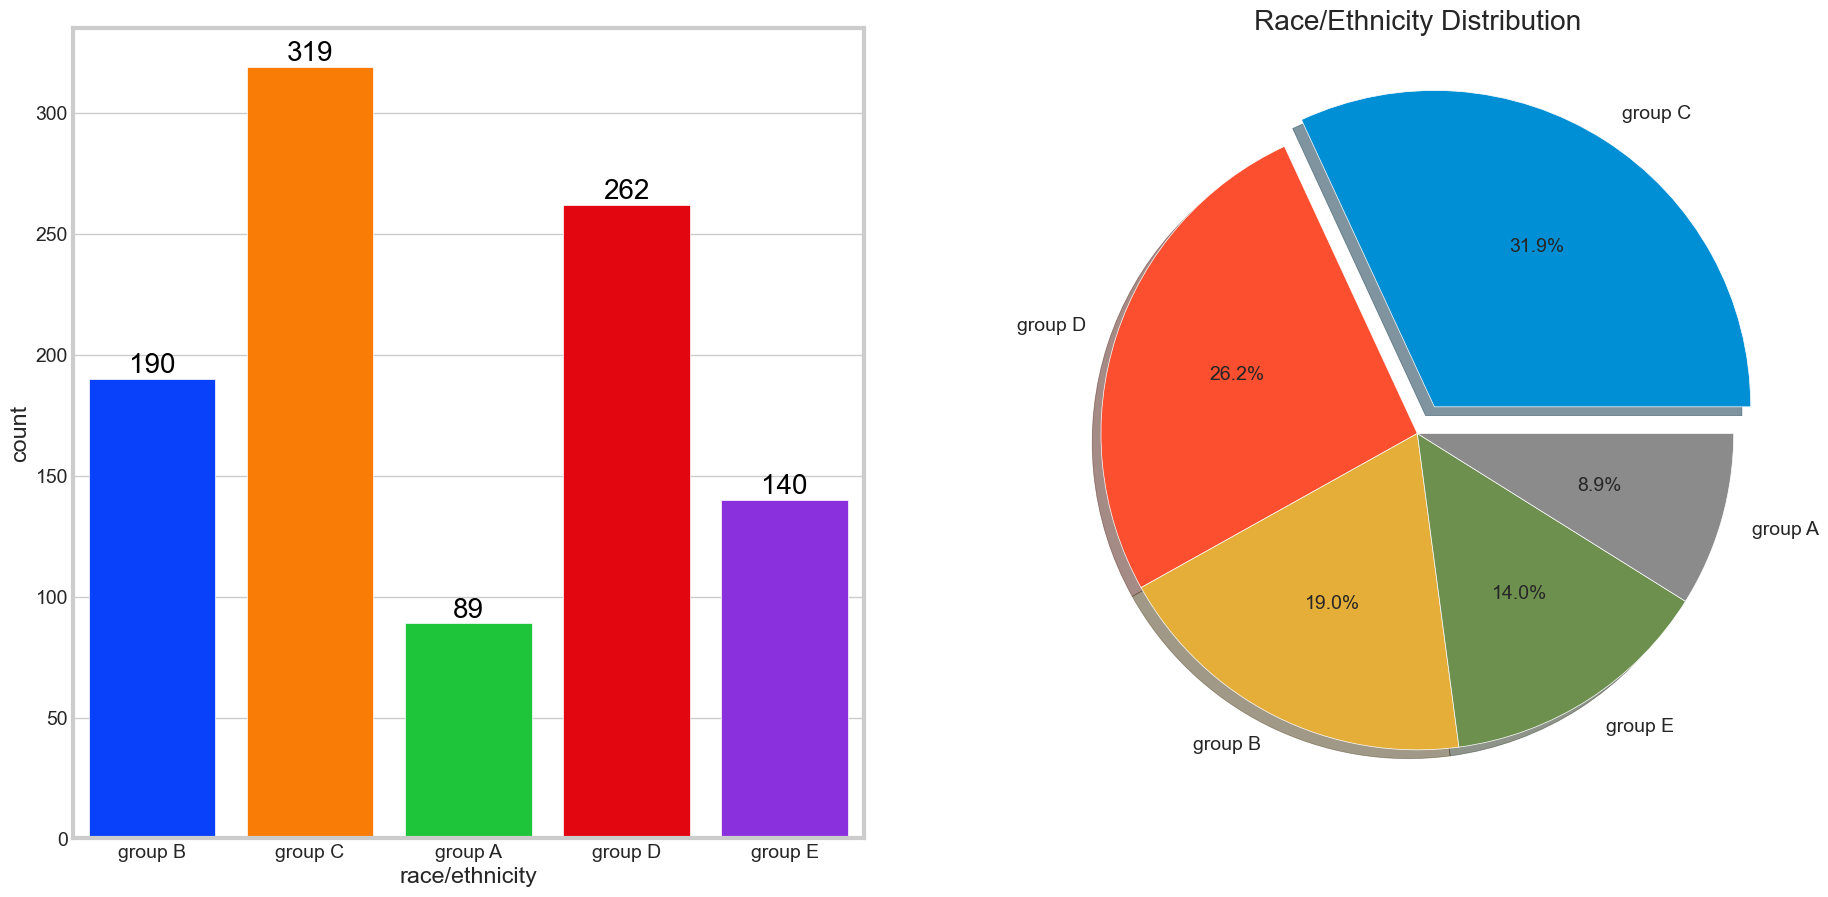

In [137]:
f, ax = plt.subplots(1,2, figsize=(20,10))

# left: bar (count) plot
sns.countplot(x='race/ethnicity', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# right: pie chart — make labels, counts, explode match length
counts = df['race/ethnicity'].value_counts()
labels = counts.index.tolist()              # same order as counts
explode = [0.1 if i == 0 else 0 for i in range(len(counts))]  # highlight largest slice
ax[1].pie(counts, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)
ax[1].set_title('Race/Ethnicity Distribution')

plt.show()


##### Insights

- Most of the student belonging from Group C/ Group D.
- Lowest number of students belong to Group A.

##### Bivariate Analysis ( Is Race/ Ethnicity has any impact on student's Performance ?)

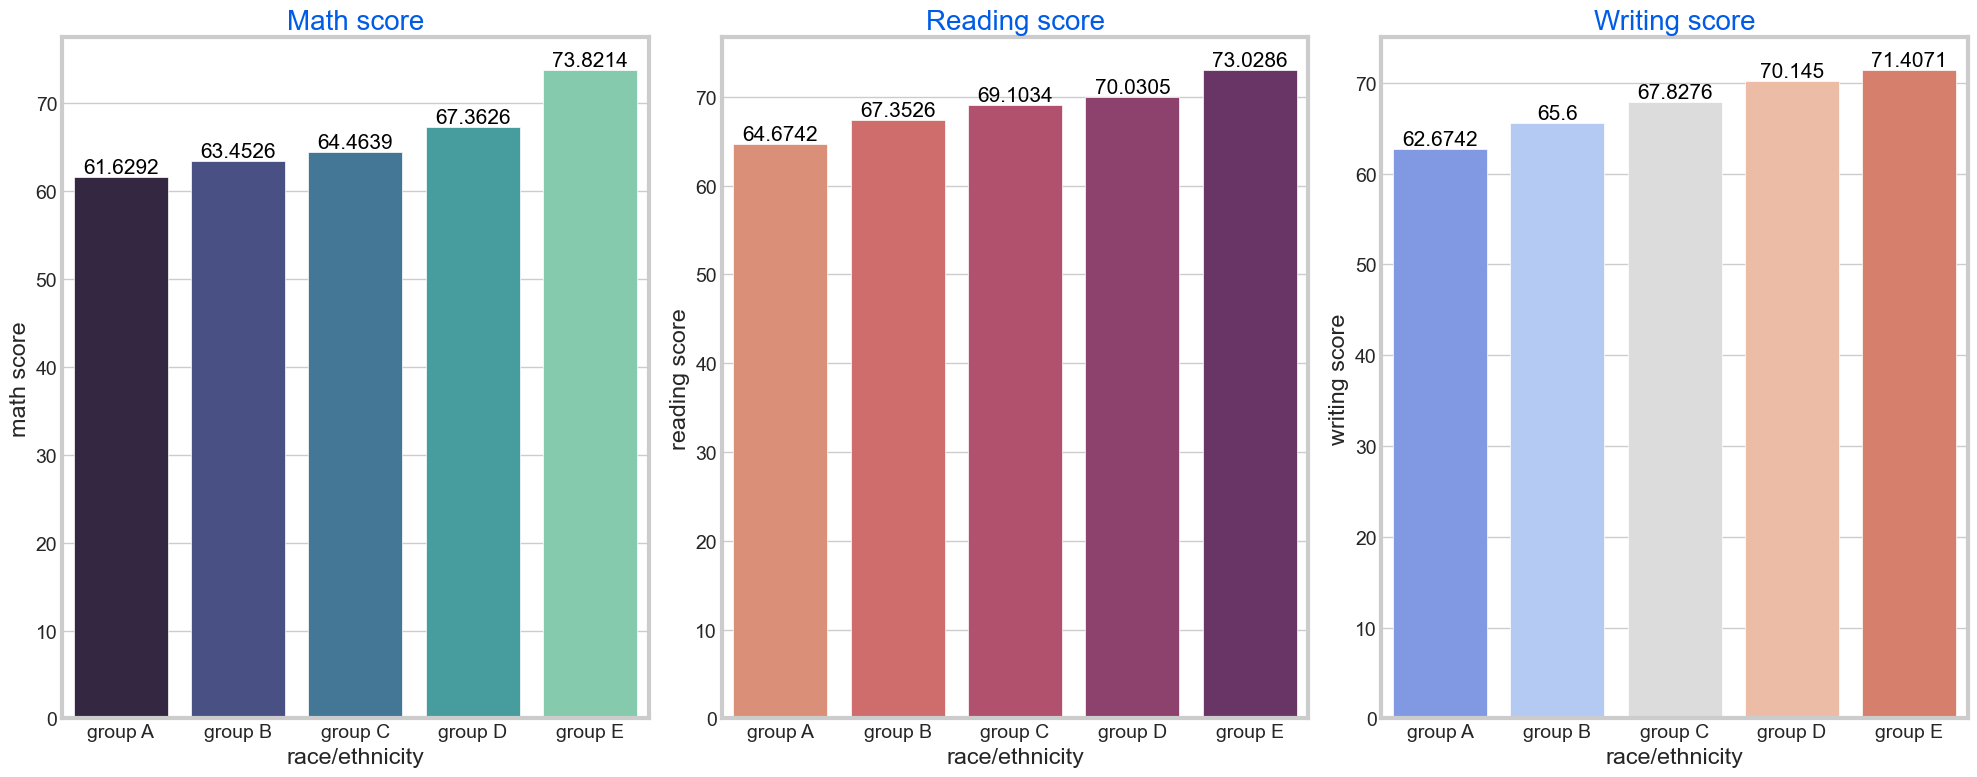

In [138]:
# Group by race/ethnicity and compute mean scores
Group_data2 = (
    df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']]
      .mean()
      .reset_index()
)

# Create 3 subplots
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# 1) Math score
sns.barplot(
    data=Group_data2,
    x='race/ethnicity',
    y='math score',
    palette='mako',
    ax=ax[0]
)
ax[0].set_title('Math score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# 2) Reading score
sns.barplot(
    data=Group_data2,
    x='race/ethnicity',
    y='reading score',
    palette='flare',
    ax=ax[1]
)
ax[1].set_title('Reading score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# 3) Writing score
sns.barplot(
    data=Group_data2,
    x='race/ethnicity',
    y='writing score',
    palette='coolwarm',
    ax=ax[2]
)
ax[2].set_title('Writing score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()


##### Insights
- Group E students have scored the hightest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 Parental of Education column

- What is educational background of student's Parent?
- Is parental education has any impact on student's on student's performance ? 

##### Univariate Analysis ( What is educational background of student's parent ?)

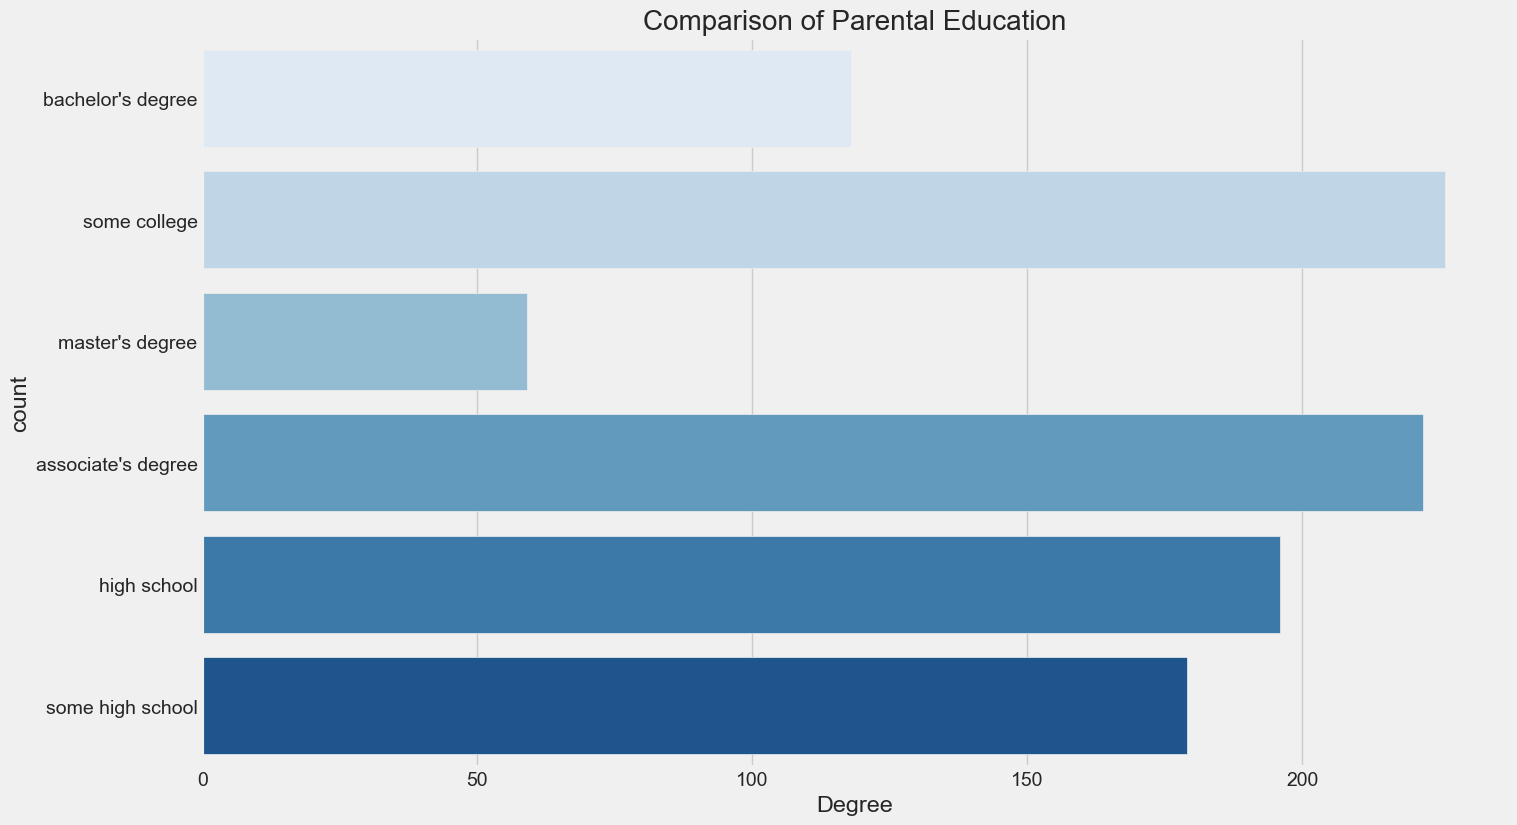

In [139]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

##### Insigths
- Largest number of parents are from some college.
- Very Less parent's have some master's degree.

##### Bivariate Analysis ( Is parental Education have any impact on student's performance )

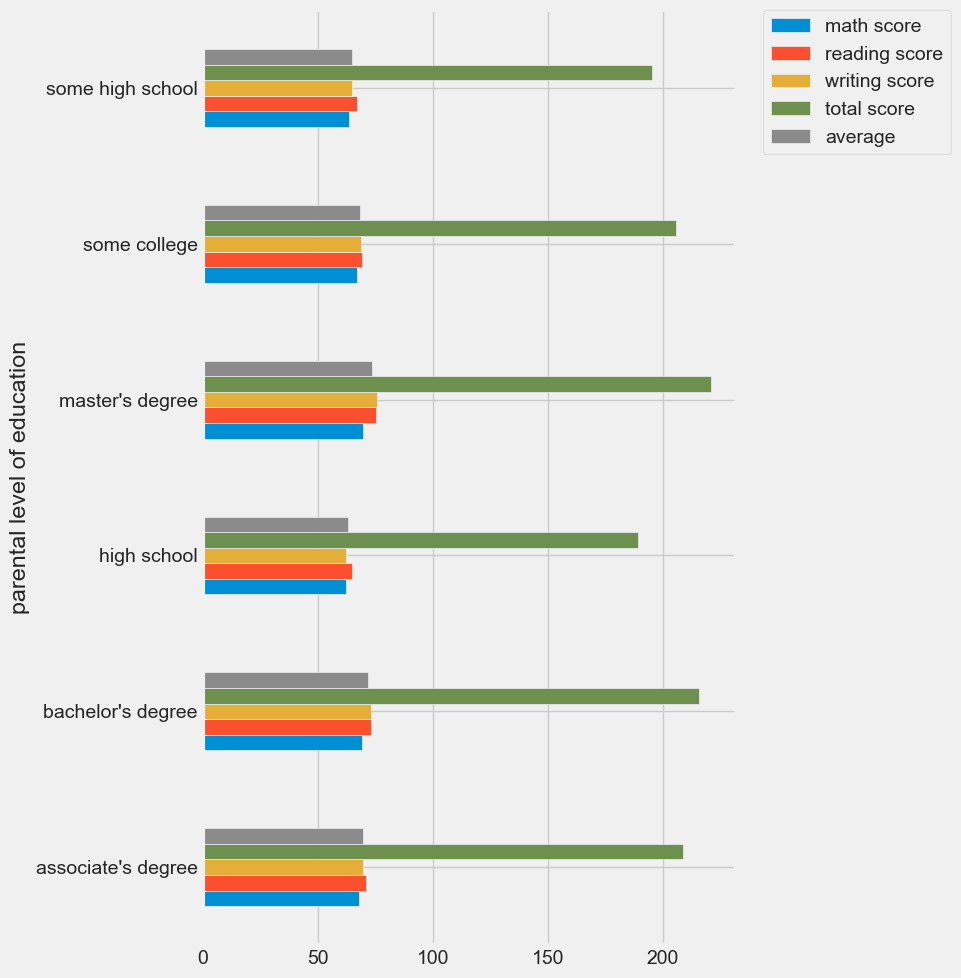

In [140]:
df.groupby('parental level of education').agg('mean', numeric_only=True).plot(
    kind='barh', figsize=(10,10)
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()


##### Insights
- The score of student whose parents posses master and bachelor level education are higher than others.

#### 4.4.4 Lunch Column

- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test result?

##### Univariate Analysis ( Which type of lunch is most common amoung students ?)

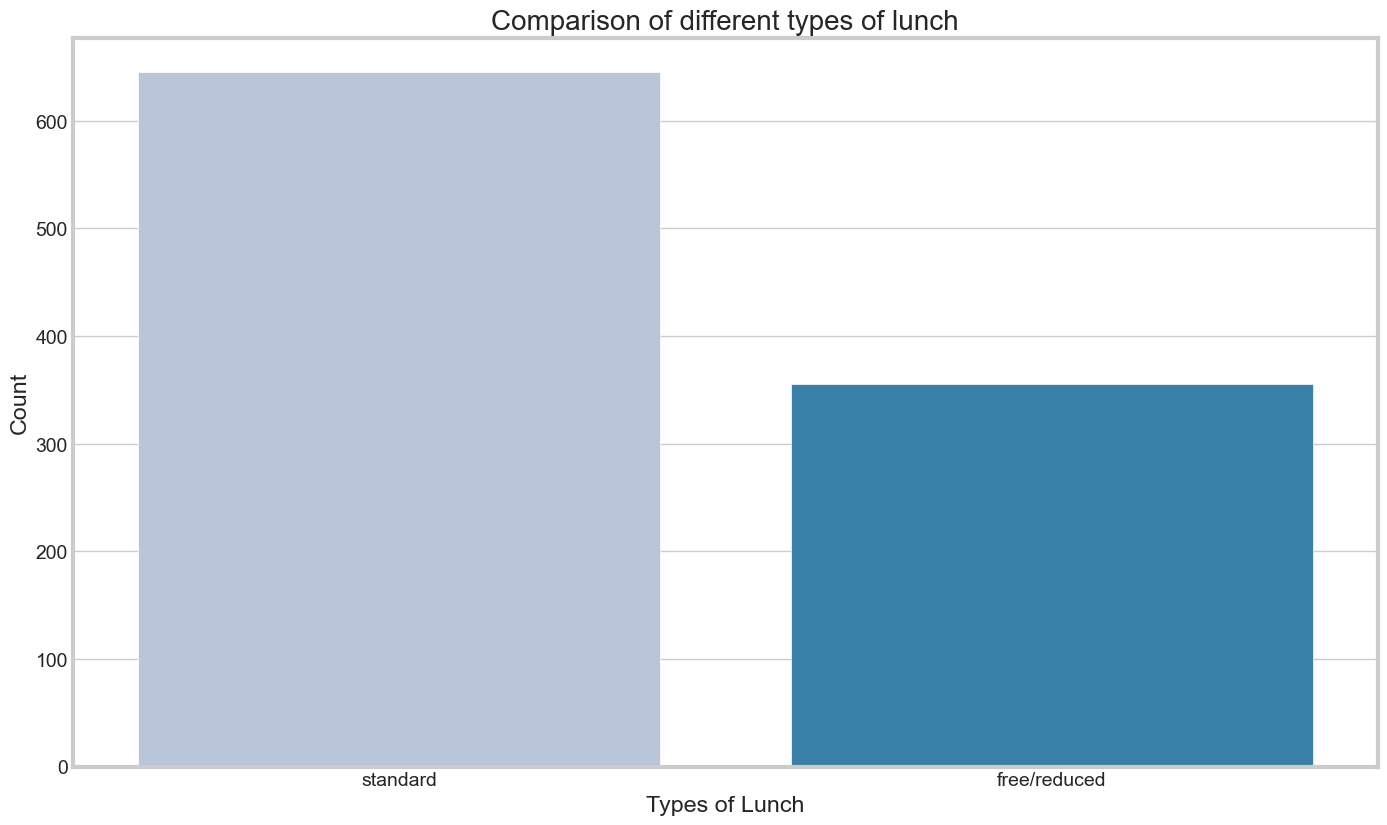

In [141]:
plt.rcParams['figure.figsize'] = (15,9)
sns.set_style("whitegrid")  
sns.countplot(x='lunch', data=df, palette='PuBu')

plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

plt.show()


##### Insights
- Students being served Standard lunch was more than free lunch

##### Bivariate Analysis ( Is lunch type intake has any impact on student's performance)

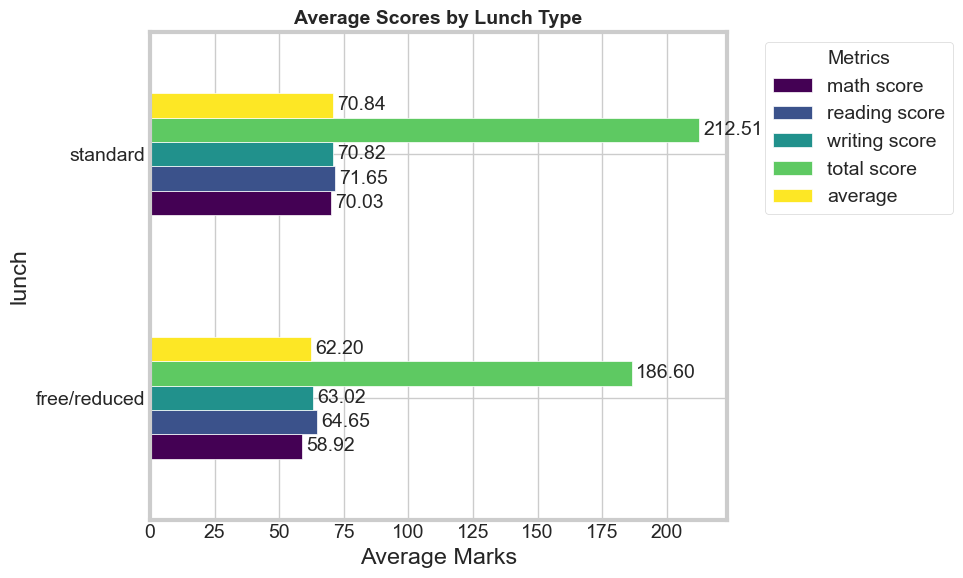

In [142]:
# Bivariate Analysis: Does lunch type impact student performance?
lunch_group = df.groupby('lunch').agg('mean', numeric_only=True)

ax = lunch_group.plot(kind='barh', figsize=(10,6), colormap='viridis')
plt.title("Average Scores by Lunch Type", fontsize=14, fontweight='bold')
plt.xlabel("Average Marks")
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

##### Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch.

#### 4.4.5 Test Preparation course 

- Which type of lunch is most common amoung students?
- Is Test Prepration course has any impact on student's performance ?

##### Bivariate Analysis ( Is test preparation course has any impact on student's performance)

<Axes: xlabel='lunch', ylabel='writing score'>

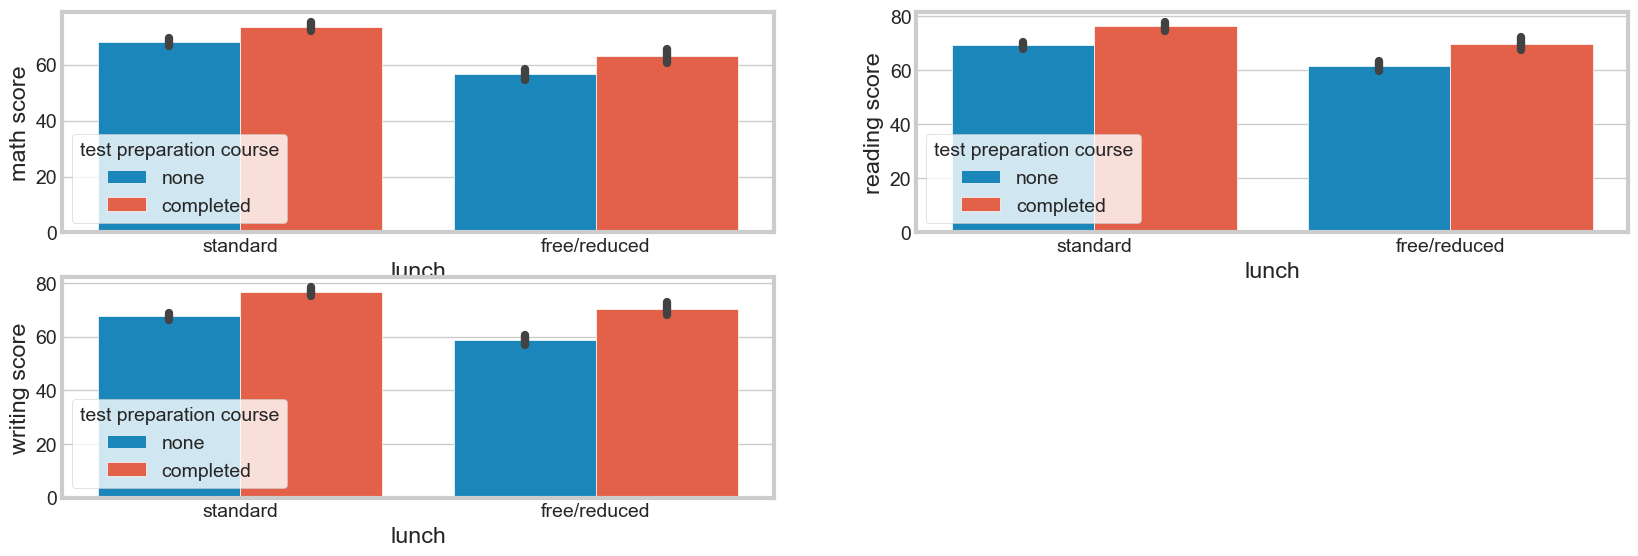

In [143]:
plt.figure(figsize=(18,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math score'], hue = df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading score'], hue = df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing score'], hue = df['test preparation course'])



##### Insights
- Students who have completed the Test Preparation Course have scores higher in all three categories.

#### 4.4.6 Checking Outliers

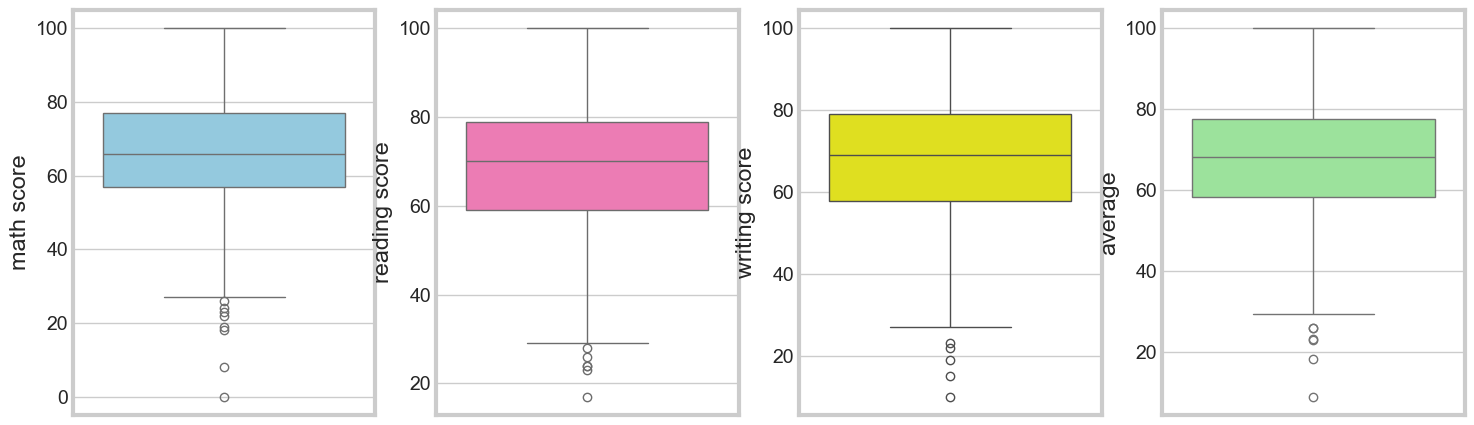

In [144]:
plt.subplots(1,4, figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'], color='hotpink')

plt.subplot(143)
sns.boxplot(df['writing score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['average'], color='lightgreen')

plt.show()

#### 4.4.7 Multivariate Analysis using Pairplot

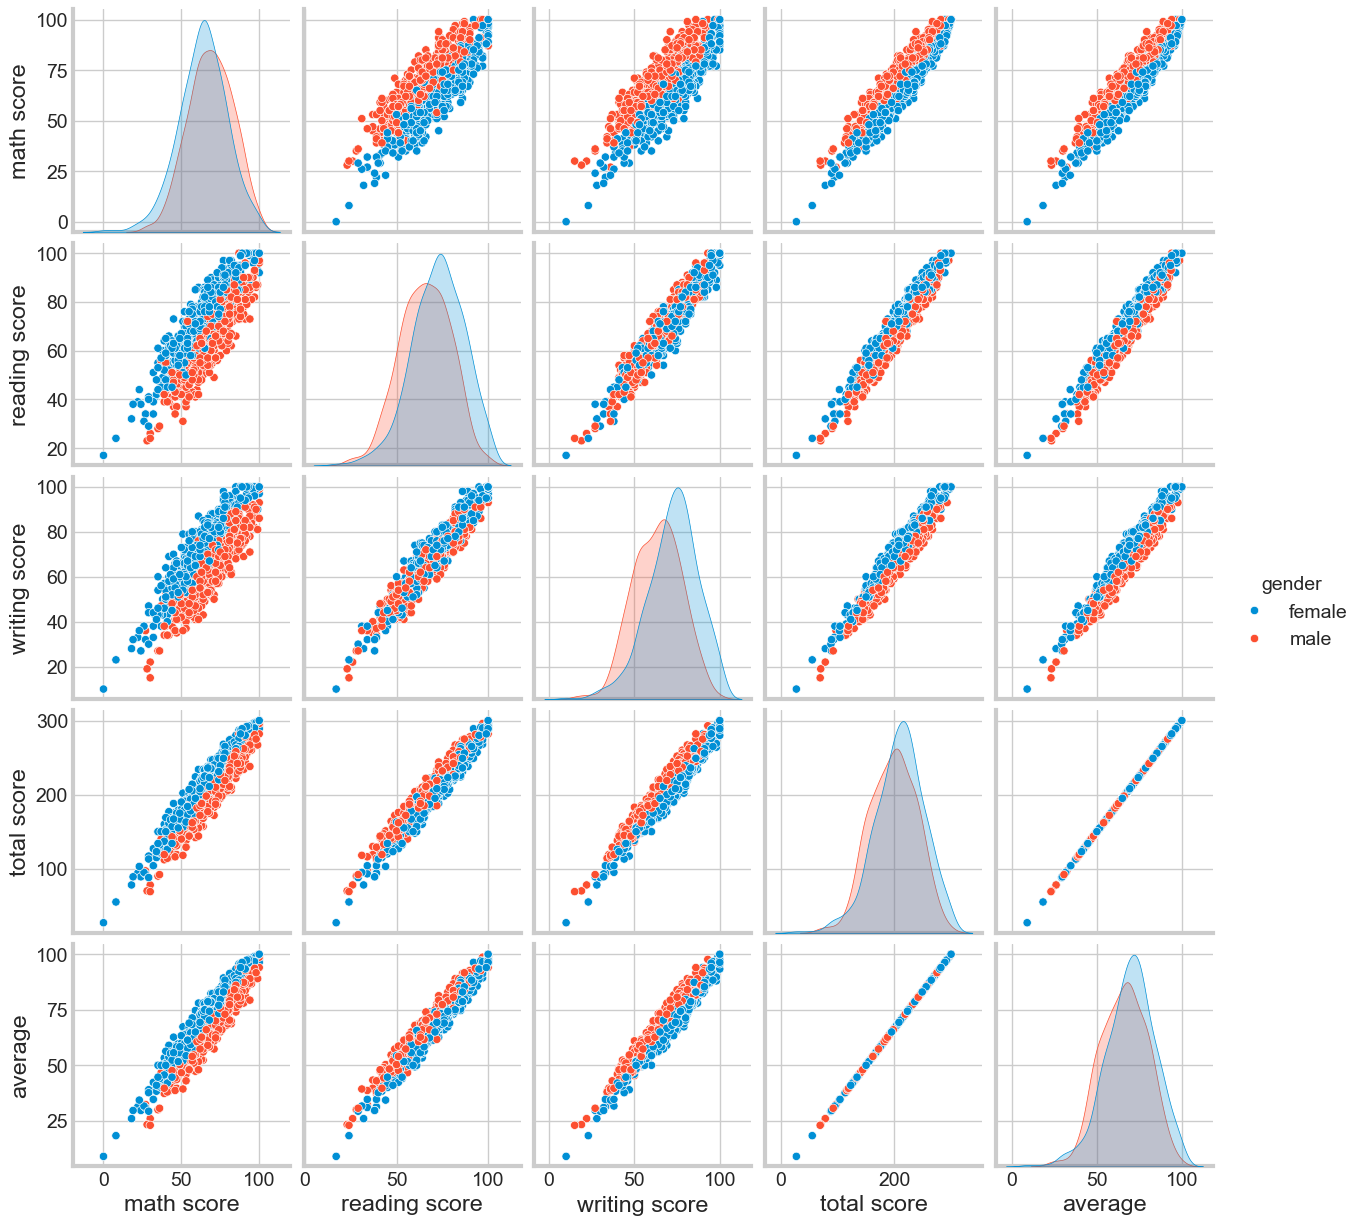

In [145]:
sns.pairplot(df,hue = 'gender')
plt.show()

##### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

#### 5. Conclusion

- Student's Performance is realted with lunch, race, parental level education.
- Females lead in pass percentage and also are top-scorers.
- Student's Performance is not much realted with test preparation course.
- Finishing preparation course is benefitial.